In [1]:
!pip install Minisom

  Created wheel for Minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=bd99580ebc8f40c971a6717dab3c063f86018a63b0fa181195505fe4e0aae5ec
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built Minisom


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#dataset : http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z (Codes and Datasets)/Part 12 - Self Organizing Map/Credit_Card_Applications.csv')

In [4]:
df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [5]:
#usupervised learning, y is not used
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

print(X.shape)

(690, 15)


In [6]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))

X = sc.fit_transform(X) 

In [7]:
from minisom import MiniSom

som = MiniSom(x=10, y=10, input_len= 15, sigma =1.0, learning_rate=0.5)

In [8]:
som.random_weights_init(X)

som.train_random(X, num_iteration=100)

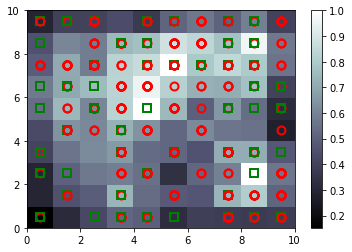

In [13]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 8,
         markeredgewidth = 2)
show()

In [14]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,7)], mappings[(8,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [15]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

print(len(frauds))

Fraud Customer IDs
15608595
15761158
15666166
15605872
15665087
15777994
15697310
15810723
15671293
15697844
15733602
15728082
15675176
15768449
15752601
15665374
15740356
17


In [16]:
customers = df.iloc[:, 1:].values #matrix of features/independent variables

is_fraud = np.array([1 if cid in frauds[:,0] else 0 for cid in df.iloc[:,0].values]) #dependent variable

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

customers = sc.fit_transform(customers)

In [18]:
import tensorflow as tf

ann = tf.keras.models.Sequential()

In [19]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann.fit(customers, is_fraud, batch_size=1, epochs=5)

Epoch 1/5
690/690 [==============================] - 1s 1ms/step - loss: 0.7747 - accuracy: 0.6667
Epoch 2/5
690/690 [==============================] - 1s 1ms/step - loss: 0.4043 - accuracy: 0.9449
Epoch 3/5
690/690 [==============================] - 1s 1ms/step - loss: 0.2510 - accuracy: 0.9754
Epoch 4/5
690/690 [==============================] - 1s 980us/step - loss: 0.1824 - accuracy: 0.9754
Epoch 5/5
690/690 [==============================] - 1s 999us/step - loss: 0.1452 - accuracy: 0.9754


In [30]:
y_pred = ann.predict(customers)

y_pred = np.concatenate((df.iloc[:,0:1].values, y_pred), axis= 1)
y_pred = y_pred[y_pred[:,1].argsort()]

print(y_pred)

[[1.57901130e+07 1.59084797e-04]
 [1.57101380e+07 1.13227963e-03]
 [1.57627160e+07 1.29264593e-03]
 ...
 [1.57206440e+07 2.28566557e-01]
 [1.57016870e+07 2.57371843e-01]
 [1.56712930e+07 3.67111623e-01]]
